<a href="https://colab.research.google.com/github/amillie100/MillerMan/blob/main/Assignments/assignment_4_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS4487 Week 4 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_4_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AdviseInvest Data Dictionary

| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |


### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [1]:
#Import libraries 🔧


## Step 1: Initial Data Understanding

 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [2]:
import pandas as pd

df = pd.read_csv("/content/adviseinvest_historical_data.csv")
display(df.head())

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [3]:
#View the datatypes
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


None

In [4]:
#Describe the data
display(df.describe())

,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,132.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


# Step 2: Exploratory Data Analysis (EDA)
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

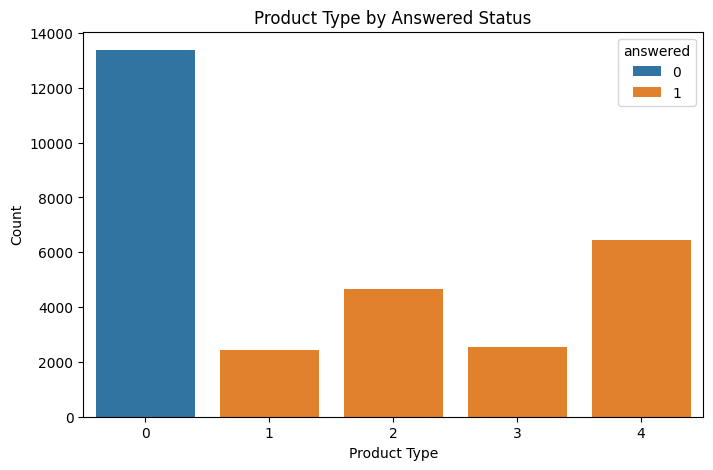

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chart 1: Relationship between 'product' and 'answered'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='product', hue='answered')
plt.title('Product Type by Answered Status')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

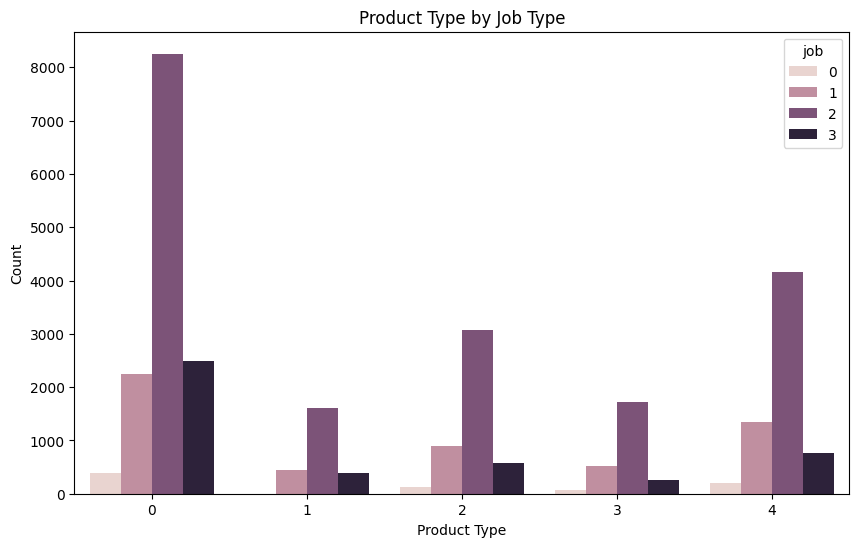

In [7]:
# Chart 2: Relationship between 'product' and 'job'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='product', hue='job')
plt.title('Product Type by Job Type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

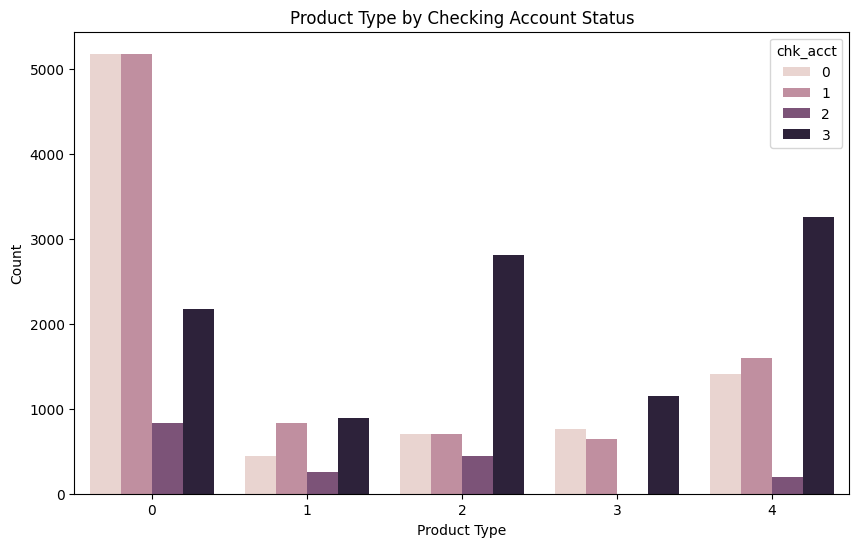

In [8]:
# Chart 3: Relationship between 'product' and 'chk_acct'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='product', hue='chk_acct')
plt.title('Product Type by Checking Account Status')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

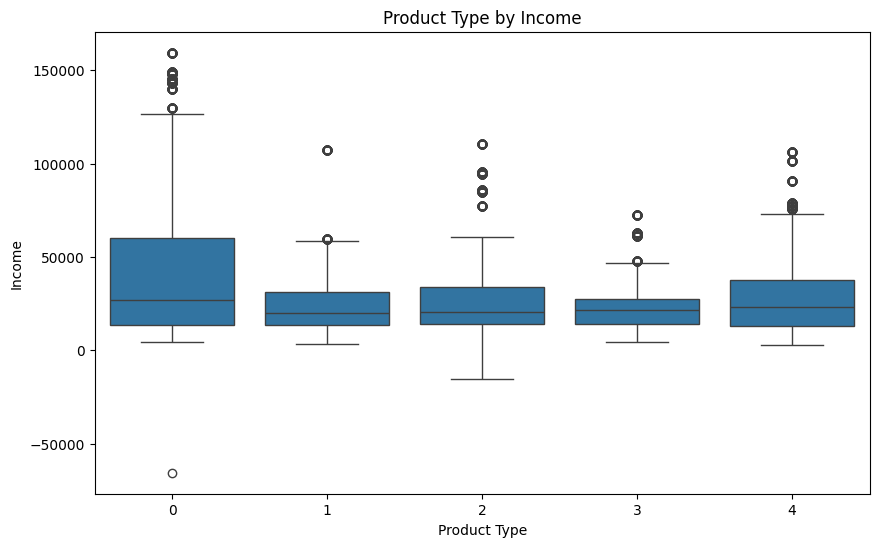

In [9]:
# Chart 4: Relationship between 'product' and 'income' (using a box plot for income ranges per product)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='product', y='income')
plt.title('Product Type by Income')
plt.xlabel('Product Type')
plt.ylabel('Income')
plt.show()

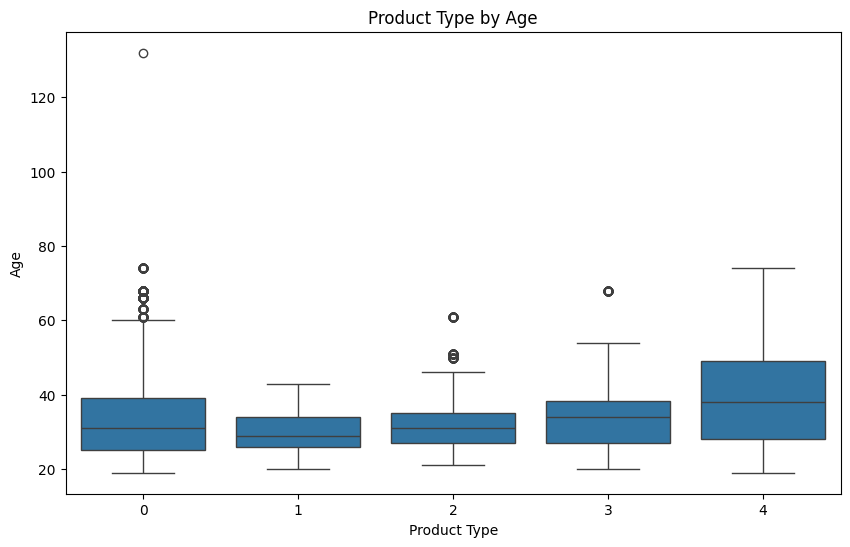

In [10]:
# Chart 5: Relationship between 'product' and 'age' (using a box plot for age ranges per product)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='product', y='age')
plt.title('Product Type by Age')
plt.xlabel('Product Type')
plt.ylabel('Age')
plt.show()

# Step 3: Summarize Your Findings
### 3.1: Are all of the variables useful and applicable to the business need?  (you should reference the target variable and whether other variables have are likely to be correlated with the target)

Write your response below:  🔧 Product type has a huge correlation with whether the customer picked up the phone because when the customer didn’t pick up the phone, there was no sales made. For the product type by job type, there is a pattern with more mid-level and management positions to buy the advanced product. Customers who have the no checking account number of an amount of less than 200$ are most likely to not answer the phone. The customers who answered the phone and decided to buy a product plan are customers who are at the highest end of the account status spectrum. For advanced product type plans along with product sales in general, those with more or equal to 35000 usd represent most of the sales. The variable age also has a correlation to product types, as the greater the age on average results in a higher likelihood of buying the intermediate plan and advanced plan.




### 3.2: In what ways could the dataset be improved?  Are there any data quality issues or data types that should be fixed?

Write your response below: 🔧 The negative input for income should be removed to improve the accuracy of the dataset. When looking at the box plot, negative numbers and outliers do help in analyzing which customers are more likely to pick up the phone and buy a certain product, however, negative numbers and extreme outliers do not help when analyzing std. Data types look good and should not be fixed.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas

In [13]:
!jupyter nbconvert --to html "assignment_4_MillerAaron.ipynb"

[NbConvertApp] Converting notebook assignment_4_MillerAaron.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 450604 bytes to assignment_4_MillerAaron.html
